In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def standardize(x):
    '''
        標準化を行う
        ------------
        x : 標準化前のx
    '''
    x_mean = x.mean()         # 平均値を求める
    std = x.std()             # 標準偏差を求める
    return (x - x_mean) / std # 標準化した値を返す

def create_matrix(x_std):
    '''
        全ての要素が1のベクトル、x_std、x_stdの2乗を
        縦方向に連結して行列を作成し、転置して返す
        ------------
        x_std : 標準化後のx
    '''
    return np.vstack(
        [np.ones(x_std.size), # 要素の値がすべて1の行ベクトル
                              # (要素数はx_stdと同じ)
         x_std,               # 標準化したxの行ベクトル
         x_std ** 2           # x_stdのすべての要素を二乗する
         ]).T                 # 作成した行列を転置する
    

def f(matrix_X, parameter):
    '''
        多項式回帰
        ------------
        matrix_X  : 行列X
        parameter : パラメーターw、w1、w2の行ベクトル
    '''
    # 多項式回帰fw(x)=Xw
    return np.dot(matrix_X, parameter)

def MSE(matrix_X, y, parameter):
    '''
        平均2乗誤差を求める
        ------------
        matrix_X  : xの行列
        y         : yの値
        parameter : パラメーターw0、w1、w2
    '''
    return (
        # データのサイズで割る
        1 / matrix_X.shape[0]) * np.sum(           
            # 二乗和誤差を求める
            (y - f(matrix_X, parameter)) ** 2)

def SGD(matrix_X, y):
    '''
        確率的勾配降下法で最適化を行う
        ------------
        matrix_X : xの行列
        y        : yの値
    '''
    # パラメータw0、w1、w2を初期化
    parameter = np.random.rand(3)
    # 学習率を0.001に設定
    LNR = 1e-3
    # 平均二乗誤差の差分を保持する変数を1で初期化
    difference = 1
    # 更新回数をカウントする変数を1で初期化
    count = 1
    # パラメーター初期値にMSE関数を適用してbeforeに代入
    err_before = MSE(matrix_X, # 行列X
                 y,            # yの値
                 parameter     # w0、w1、w2のベクトル
                 )
    # ログの書式
    log = '({}) parameter: {} error: {:.4f}'  
    # MSEの差分が0.01以下になるまで更新を繰り返す
    while difference > 1e-2:
        # サンプルを抽出するためのインデックスを
        # データの数だけランダムに生成
        p = np.random.permutation(matrix_X.shape[0])
        # データからxとyのペアをランダムに1セットずつ取り出す
        # 行列Xからp行を抽出、ベクトルyからp成分を抽出
        for tmp_x, tmp_y in zip(matrix_X[p,:], y[p]):
            # 確率的勾配降下法でパラメーターを更新
            parameter = parameter - LNR * (
                f(tmp_x,    # 抽出したx
                  parameter # パラメーターのベクトル
                  ) - tmp_y # 抽出したy
                ) * tmp_x
        # 更新後のw0,w1,w3の値で平均二乗誤差を求める
        err_after = MSE(matrix_X, # xの行列
                    y,            # yの値
                    parameter     # ミニバッチで求めたw0,w1,w3
                    )

        # パラメーター更新前後における平均二乗誤差の差分を求める
        difference = err_before - err_after     
        # パラメーター更新後の誤差をerr_beforeの値にする
        err_before = err_after
        # 最初の1回と以降100回ごとにログを出力
        if (count == 1 or count % 100 == 0):
            print(log.format(count, parameter, difference))
        # カウンター変数の値を1増やす
        count += 1

    # 最後の更新時のログを出力
    print(log.format(count, parameter, difference))        
    # 多項式回帰で求めたパラメーターθ0、θ1、θ2の行ベクトルを戻り値として返す
    return parameter

(1) parameter: [25.48326145  6.03100082 26.96272301] error: 135863.9752
(100) parameter: [844.71808621 259.13485722 280.99534394] error: 1445.9983
(200) parameter: [1062.05171116  286.21965113  160.9278528 ] error: 247.2716
(300) parameter: [1153.50846149  285.34208513  108.56533876] error: 44.9223
(400) parameter: [1192.50805975  283.28658111   86.19343912] error: 8.2011
(500) parameter: [1209.14595102  282.17328519   76.57311008] error: 1.4975
(600) parameter: [1216.26362466  281.67215101   72.47492959] error: 0.2743
(700) parameter: [1219.31142056  281.44424342   70.73387207] error: 0.0511
(788) parameter: [1220.49491671  281.36908117   70.04173847] error: 0.0094


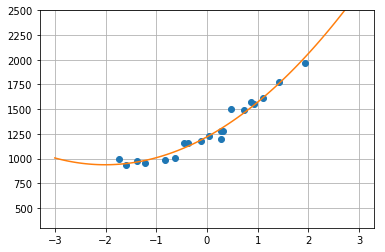

In [2]:
# 学習データを読み込む
data = np.loadtxt('sales.csv',   # 読み込むファイル
                  dtype='int',   # データ型を指定
                  delimiter=',', # 区切り文字を指定
                  skiprows=1     # 1行目のタイトルを読み飛ばす
                  )
x = data[:,0]                    # 1列目の成分をxに代入
y = data[:,1]                    # 2列目の成分をyに代入
standardized_x = standardize(x)  # xのすべての要素を標準化
# 標準化したxを行列にする
matrix_x = create_matrix(standardized_x)
# 確率的勾配降下法でw0,w1,w3を求める
parameter = SGD(matrix_x, y)
# x軸の値として-3から3までの等差数列を生成
x_axis = np.linspace(start=-3,   # 数列の始点
                     stop=3,     # 数列の終点
                     num=100     # 等差数列の要素数
                     )
plt.ylim(300, 2500)              # y軸の範囲を設定
# 標準化したxの値とyの値が交差するポイントをプロット
plt.plot(standardized_x, y, 'o')
# x軸の等差数列に対応するyをf()関数で求め、回帰直線をプロット
plt.plot(x_axis,                             # x軸の値
         f(create_matrix(x_axis), parameter) # y軸の値
         )
plt.grid(True) # グリッドを表示
plt.show()     # グラフを表示